# NumPy

In this lesson, we'll learn about ways to represent and manipulate images in Python. By the end of this lesson, students will be able to:

- Apply `ndarray` arithmetic and logical operators with numbers and other arrays.
- Analyze the shape of an `ndarray` and index into a multidimensional array.
- Apply arithmetic operators, indexing, and slicing to manipulate RGB images.

We'll need two new modules: `imageio`, which provides utilities to read and write images in Python, and `numpy`, which provides the data structures for representing images in Python.

In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Reading an image

Let's use imageio's `imread` method to load a color picture as a grid of pixels. To then show an image, we can plot its pixels using the matplotlib function `imshow`.

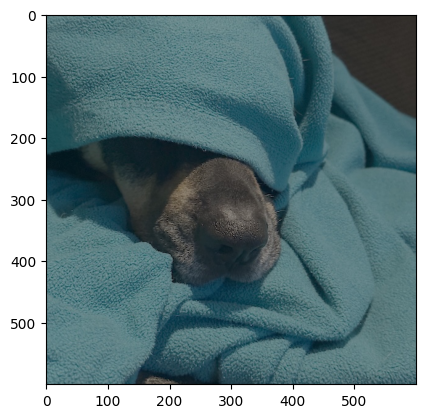

In [2]:
jax = iio.imread("jax.jpg")
plt.imshow(jax)

We could also read this image in as a black-and-white image using the `mode="L"` option to `imread` and `cmap="gray"` to `imshow`. "L" stands for "luminance," a method to convert color to grayscale. "cmap" stands for "colormap," saying to treat pixels as grayscale.

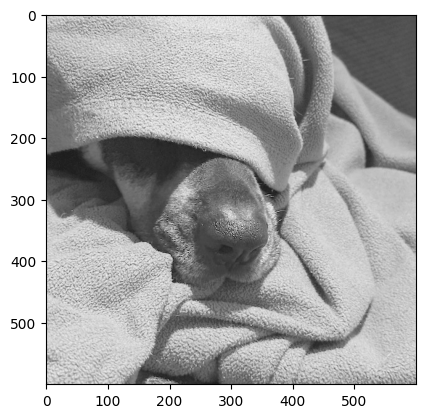

In [3]:
jax = iio.imread("jax.jpg", mode="L")
plt.imshow(jax, cmap="gray")

What kind of Python object does `imread` return?

In [4]:
type(jax)

numpy.ndarray

Pandas uses NumPy to represent a `Series` of values, so many element-wise operations should seem familiar. In fact, we can load an image into a Pandas `DataFrame` and see that this grayscale image is really a 2-d array of grayscale values ranging from [0, 255].

In [5]:
pd.DataFrame(jax)

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,109,115,115,116,122,121,117,120,128,121,...,49,49,46,47,47,48,48,48,47,45
1,114,116,114,113,118,119,116,117,131,124,...,50,49,49,47,47,48,48,47,47,48
2,122,124,122,118,118,121,116,107,120,122,...,50,50,50,47,45,47,47,45,45,47
3,123,123,124,121,115,115,116,113,118,127,...,50,49,48,47,46,47,47,46,45,46
4,124,115,113,118,120,120,122,125,126,127,...,49,49,47,48,48,47,47,48,48,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,128,125,128,124,112,106,109,118,124,123,...,78,98,104,101,97,105,100,85,91,106
596,123,113,113,116,116,106,95,101,111,114,...,70,79,85,93,109,111,100,86,83,97
597,116,99,94,108,125,119,103,103,121,124,...,69,78,84,82,82,84,83,79,80,83
598,106,93,89,104,126,133,125,123,123,125,...,62,69,82,81,57,55,68,72,81,86


What do you think the colorful `DataFrame` should look like?

In [ ]:
jax_color = iio.imread("jax.jpg")
# -1 says "do the ordering yourself" into the numnber of columns specified later
reshaped = jax_color.reshape(-1, 3)
pd.DataFrame(reshaped, columns= ["R", "G", "B"])

,R,G,B
0,87,118,120
1,93,124,126
2,93,124,126
3,94,125,127
4,100,131,133
...,...,...,...
359995,71,105,114
359996,61,95,104
359997,51,85,94
359998,49,86,94


## Array manipulation

Images are represented in Python with the type `numpy.ndarray` or "n-dimensional array." Grayscale images are 2-dimensional arrays with pixel luminance values indicated in each position. Color images are 3-dimensional arrays with pixel color values indicated for each channel (red, green, blue) in each position. Can you set the left and right sides of this picture to `0` so that Jax appears surrounded by black borders?

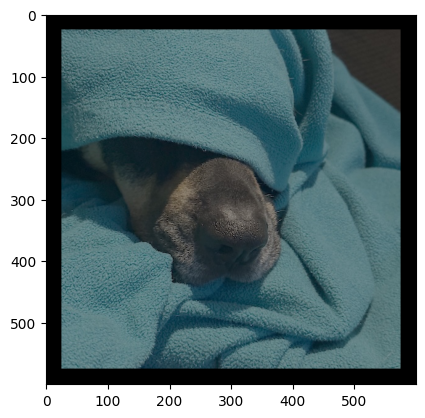

In [7]:
jax = iio.imread("jax.jpg")
jax[:600, :25] = 0
jax[:25, :600] = 0
jax[575:600, :600] = 0
jax[:600, 575:600] = 0
plt.imshow(jax)

When we're performing an assignment on 2-dimensions of a 3-dimensional image, NumPy follows [**broadcasting rules**](https://numpy.org/doc/stable/user/basics.broadcasting.html#general-broadcasting-rules) to evaluate the operation. The simplest version of broadcasting are just element-wise operations.

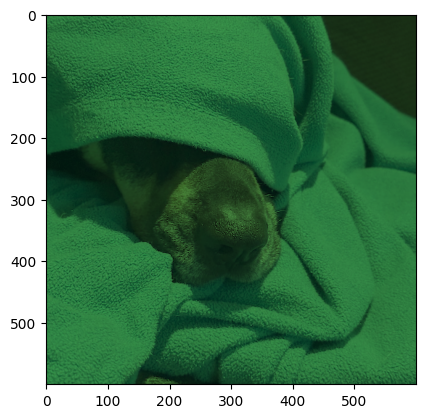

In [22]:
jax = iio.imread("jax.jpg")
plt.imshow(jax // [2, 1, 2])

Let's try a more complicated example. Using the floor division operator, fill in the `imshow` call to decrease only the green channel so that the overall picture is much more purple than before.

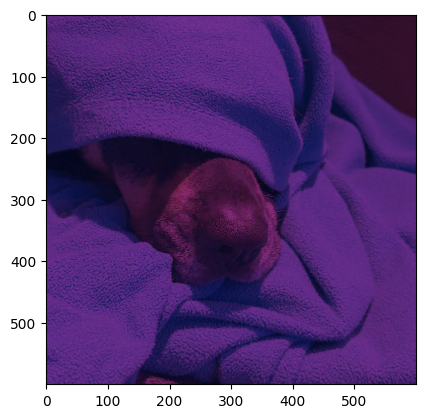

In [9]:
jax = iio.imread("jax.jpg")
plt.imshow(jax // [1, 3, 1])

## Practice: Instafade

Write code to apply a fading filter to the image. The fading filter reduces all color values to 77% intensity and then adds 38.25 to each resulting color value. (These numbers are somewhat arbitrarily chosen to get the desired effect.)

The provided code converts the `oj` array from integer values to floating-point decimal values. To display the final image, the code converts the numbers in the `oj` array back to `uint8` before passing the result to `imshow`.

Text(0.5, 1.0, 'Faded')

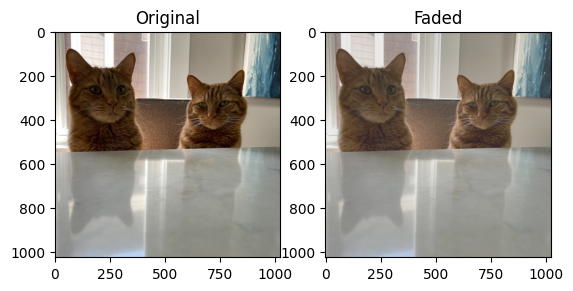

In [10]:
oj = iio.imread("oj.jpg").astype("float32")
oj2 = oj * [0.77, 0.77, 0.77] + [38.25, 38.25, 38.25]
fig, axes = plt.subplots(1, 2)
axes[0].imshow(oj.astype("uint8"))
axes[0].set_title("Original")
axes[1].imshow(oj2.astype("uint8"))
axes[1].set_title("Faded")

## Practice: Image Color Manipulation

Write code to apply the following operations to an image.

1. **Expand the red colors by 50%** by subtracting 128 from each red channel value, multiply the result by 1.5, and then add 128 to restore the original value range.
1. **Increase the blue colors by 25** by adding 25 to each blue channel value.
1. **Add black letterboxing bars** by setting the top 150 and bottom 150 pixels to black.
1. **Clip color values outside the range [0, 255]** by reassign all values above 255 to 255 and all values below 0 to 0.

Text(0.5, 1.0, 'Faded')

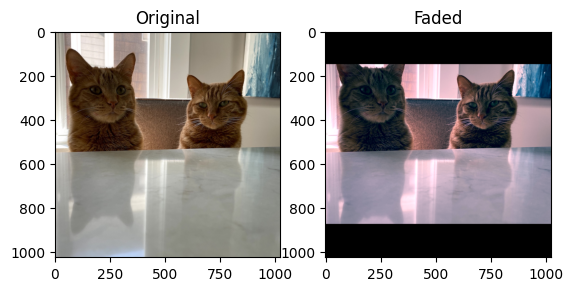

In [20]:
oj = iio.imread("oj.jpg").astype("float32")

r = oj[:, :, 0]
g = oj[:, :, 1]
b = oj[:, :, 2]

r = (( r - 128 ) * 1.5) + 128
b = b + 25

oj2 = np.dstack((r,g,b))

oje = np.clip(oj2, 0, 255)
oje[:150, :1024] = 0
oje[874:1024, :1024] = 0

fig, axes = plt.subplots(1, 2)
axes[0].imshow(oj.astype("uint8"))
axes[0].set_title("Original")
axes[1].imshow(oje.astype("uint8"))
axes[1].set_title("Faded")

## Optional: Advanced broadcasting

What is the result of adding the following two arrays together following the broadcasting rules?

In [ ]:
x = np.array([[1], [2], [3]])
x

In [ ]:
y = np.array([1, 2, 3])
y